# Importación y exploración del dataset

In [1]:
import pandas as pd
import pandas as pd
import numpy as np  # Agrega esta línea para importar NumPy

#Aqui extraemos el dataset (df_sucio) 

df_sucio = pd.read_csv('ny.csv')


#aqui realizo la limpieza del dataset guardandolo en df

df= df_sucio.drop(columns=["description","last_scraped","host_since","minimum_minimum_nights","bathrooms","maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","number_of_reviews_l30d","host_response_time","name","instant_bookable","review_scores_checkin","review_scores_communication","host_is_superhost","host_has_profile_pic","neighbourhood","review_scores_accuracy","picture_url","minimum_nights","maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm", "host_id","host_about","host_thumbnail_url","host_neighbourhood","calculated_host_listings_count_entire_homes","host_listings_count","has_availability","calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","source", "host_picture_url","host_url", "host_verifications","calendar_updated","license","neighborhood_overview", "id", "listing_url", "scrape_id","review_scores_value", "host_about","host_location","host_name"])




df['bathrooms_text'] = df['bathrooms_text'].str.replace(' bath', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' baths', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace('shared baths', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace('private bath', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace('[^\d.]', '', regex=True)
df['bathrooms_text'].replace('', np.nan, inplace=True)

df['bathrooms_text'] = df['bathrooms_text'].astype(float)


df['price'] = df['price'].str.replace('[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'])

df['host_response_rate'] = df['host_response_rate'].str.replace('[%,]', '', regex=True)
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('[%,]', '', regex=True)
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])





# Ejemplo de DataFrame
data = [
    ["Shared pool", "Hot water", "Shared sauna"],
    ["Air conditioning", "Washer", "Dedicated workspace", "Security cameras on property", "Gym"],
    ["Shared pool", "Hot water"],
    ["Gym"],
    []
]



def calcular_puntaje_porcentaje(amenities):
    # Lista de los valores que deben estar presentes para cada nivel de puntaje
    valores_nivel_5 = ["Free street parking", "Elevator", "Essentials", "Hot water", "Air conditioning", "Kitchen", "Microwave", "Long term stays allowed", "Hair dryer", "Coffee maker", "Wifi", "Cooking basics", "Heating", "TV", "Hangers", "Smoke alarm", "Dishes and silverware", "Oven", "Refrigerator", "Shampoo"]
    
    # Contar cuántos valores de nivel 5 están presentes en amenities
    count_nivel_5 = sum(1 for val in valores_nivel_5 if val in amenities)
    
    # Calcular el porcentaje de valores de nivel 5 en amenities
    porcentaje = (count_nivel_5 / len(valores_nivel_5)) * 100
    
    # Asignar el puntaje según el porcentaje
    if porcentaje >= 85:
        return 5
    elif porcentaje >= 75:
        return 4
    elif porcentaje >= 65:
        return 3
    elif porcentaje >= 20:
        return 2
    elif porcentaje == 0:
        return 0
    else:
        return 1


# Aplicar la función para crear la nueva columna "puntaje_amenities"
df['⭐Amenities_Score'] = df['amenities'].apply(calcular_puntaje_porcentaje)


df = df.drop("amenities", axis=1)
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 'f': 0})



top_10_maximos = df.nlargest(50, 'price')
filas_1_al_6 = top_10_maximos.iloc[1:4]
filas_7_al_11 = top_10_maximos.iloc[4:10]

df.loc[filas_1_al_6.index, '⭐Amenities_Score'] = 5

df.loc[filas_7_al_11.index, '⭐Amenities_Score'] = 4

import pandas as pd

# Supongamos que tienes un DataFrame llamado df con la columna 'neighbourhood_cleansed'
# y deseas crear la nueva columna 'neighbourhood_zone'

# Definimos una función para asignar la zona en función de los criterios
def asignar_zona(row):
    zonas_noreste = ['Palermo', 'Recoleta', 'Nuñez', 'Belgrano', 'Coghlan', 'Colegiales', 'Retiro', 'Villa Crespo', 'Chacarita']
    zonas_sureste = ['Boca','Barracas', 'Puerto Madero', 'Almagro', 'Balvanera', 'San Nicolas', 'Monserrat', 'San Telmo', 'Constitucion', 'Boedo', 'Caballito', 'Parque Chacabuco', 'San Cristobal']
    zonas_noroeste = ['Saavedra', 'Villa Pueyrredon', 'Villa Urquiza', 'Villa Ortuzar', 'Villa Devoto', 'Villa Del Parque', 'Agronomia', 'Parque Chas', 'Paternal', 'Flores', 'Monte Castro']
    zonas_suroeste = ['Velez Sarsfield', 'Mataderos', 'Parque Avellaneda', 'Villa Real', 'Versalles', 'Nueva Pompeya', 'Villa Riachuelo', 'Villa Soldati', 'Villa Santa Rita', 'Villa Gral. Mitre']
    
    if row['neighbourhood_cleansed'] in zonas_noreste:
        return 'Noreste'
    elif row['neighbourhood_cleansed'] in zonas_sureste:
        return 'Sureste'
    elif row['neighbourhood_cleansed'] in zonas_noroeste:
        return 'Noroeste'
    elif row['neighbourhood_cleansed'] in zonas_suroeste:
        return 'Suroeste'
    else:
        return 'Otro'  # Puedes asignar un valor 'Otro' para los casos que no coinciden con los criterios

# Aplicamos la función a cada fila del DataFrame y creamos la nueva columna 'neighbourhood_zone'
df['neighbourhood_zone'] = df.apply(asignar_zona, axis=1)

# Imprimimos el DataFrame con la nueva columna
df.iloc[16]
df = df.drop("neighbourhood_zone", axis=1)


#con la funcion head mostramos los primeros 10 datos del dataset
df.head(10)


,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_cleanliness,review_scores_location,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score
0,NaN,NaN,2.0,0.0,Bushwick,Brooklyn,40.68457,-73.91181,Private room in rental unit,Private room,...,5,0,2016-08-14,2018-04-30,4.80,5.00,4.80,1,0.06,3
1,NaN,NaN,1.0,1.0,Hell's Kitchen,Manhattan,40.76878,-73.98719,Private room in rental unit,Private room,...,0,0,NaN,NaN,NaN,NaN,NaN,1,NaN,2
2,NaN,NaN,1.0,0.0,Sunnyside,Queens,40.74343,-73.91865,Entire rental unit,Entire home/apt,...,0,0,NaN,NaN,NaN,NaN,NaN,1,NaN,2
3,NaN,NaN,2.0,1.0,Bedford-Stuyvesant,Brooklyn,40.68180,-73.93121,Entire rental unit,Entire home/apt,...,2,0,2018-01-07,2019-01-20,5.00,5.00,5.00,1,0.03,2
4,NaN,100.0,1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.68209,-73.94279,Entire rental unit,Entire home/apt,...,88,14,2017-12-30,2023-06-20,4.98,4.99,4.94,1,1.26,5
5,100.0,99.0,9.0,1.0,East Village,Manhattan,40.72625,-73.98691,Private room in condo,Private room,...,61,31,2022-01-02,2023-09-03,4.43,4.07,4.85,2,2.86,5
6,100.0,99.0,9.0,1.0,East Village,Manhattan,40.72813,-73.98801,Private room in condo,Private room,...,41,9,2021-12-18,2023-09-10,4.29,4.10,4.80,2,1.88,5
7,NaN,NaN,2.0,0.0,Jackson Heights,Queens,40.75413,-73.86037,Private room in rental unit,Private room,...,3,0,2020-02-17,2020-03-09,5.00,5.00,5.00,1,0.07,4
8,NaN,NaN,2.0,1.0,Kips Bay,Manhattan,40.73779,-73.98032,Entire rental unit,Entire home/apt,...,9,0,2014-08-07,2015-05-21,4.67,4.78,4.67,1,0.08,2
9,NaN,0.0,1.0,0.0,Crown Heights,Brooklyn,40.67742,-73.94956,Entire rental unit,Entire home/apt,...,6,0,2016-01-05,2022-04-02,5.00,4.83,5.00,1,0.06,4


*Estructura del dataset*


# El dataset incluye las siguientes columnas relevantes:

**last_scraped:** La fecha en la que los datos fueron extraídos por última vez del sitio web.

**host_response_rate:** La tasa de respuesta del anfitrión, que indica qué tan rápido responde un anfitrión a las consultas de los huéspedes.

**host_acceptance_rate:** La tasa de aceptación del anfitrión, que muestra la proporción de solicitudes de reserva que un anfitrión ha aceptado.

**host_identity_verified:** Indica si la identidad del anfitrión ha sido verificada por la plataforma.

***neighbourhood_cleansed:** El nombre del barrio o vecindario en el que se encuentra la propiedad, después de haber sido limpiado.

**property_type:** El tipo de propiedad, como apartamento, casa, cabaña, etc.

**room_type:** El tipo de habitación o alojamiento que se ofrece, como habitación privada, casa/apartamento completo, habitación compartida, etc.

**accommodates:** El número máximo de personas que la propiedad puede alojar.

**bathrooms_text:** El número de baños que posee la propiedad.

**bedrooms:** El número de dormitorios en la propiedad.

**beds:** El número total de camas disponibles en la propiedad.

**price:** El precio de alquiler por noche de la propiedad.

**calendar_last_scraped:** La fecha en la que se raspó por última vez el calendario de disponibilidad de la propiedad.

**number_of_reviews:** El número total de reseñas que ha recibido la propiedad.

**number_of_reviews_ltm:** El número de reseñas que la propiedad ha recibido en el último mes.

**first_review:** La fecha de la primera reseña realizada por un huésped.

**last_review:** La fecha de la última reseña realizada por un huésped.

**review_scores_rating:** La puntuación promedio de todas las reseñas de la propiedad, en una escala de 0 a 5.

**reviews_per_month:** El promedio de reseñas que la propiedad recibe cada mes.

**Amenities_Score:** Una métrica o puntuación (en una escala de 1 a 5) relacionada con las comodidades o servicios que ofrece la propiedad, calculada en función de las comodidades enumeradas en el anuncio y teniendo en cuenta aquellas que son mas importantes para los huespedes.

**describe() 
proporciona estadísticas como 
la cantidad de valores (count), 
la media (mean), la desviación estándar (std),
el valor mínimo (min), 
los cuartiles 25%, 50% (mediana) y 75%, 
y el valor máximo (max) para cada columna del DataFrame. 
Esto te ayuda a comprender la distribución de los datos y a identificar valores atípicos.**


In [2]:
#Aqui visualizamos la cantidad de filas y columnas del dataset

filas=df.shape[0]
columnas=df.shape[1]
print("Filas del dataset:  " + str(filas))
print("Columnas del dataset:  " + str(columnas))


Filas del dataset:  38792
Columnas del dataset:  30


In [ ]:
df.describe()
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar una fuente que tenga el glifo que falta

# Ahora crea tus visualizaciones con Seaborn
# Por ejemplo:
sns.pairplot(df)
plt.figure(figsize=(10, 5))

plt.show()



*La función type() es una función incorporada en Python que se utiliza para determinar el tipo de un objeto o valor. Puedes usar esta función para averiguar si una variable es un número entero, una cadena de texto, una lista, un diccionario, una función u otro tipo de objeto en Python.*

In [39]:
df.dtypes

host_response_rate                float64
host_acceptance_rate              float64
host_total_listings_count         float64
host_identity_verified            float64
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                    float64
bedrooms                          float64
beds                              float64
price                             float64
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
calendar_last_scraped              object
number_of_reviews                   int64
number_of_reviews_ltm               int64
first_review                       object
last_review                       

# Analisis de valores nulos en las columnas

In [75]:
df.fillna(0, inplace=True)
nulos = df.isnull()
nulos
numero_nulos = nulos.sum()  # Esto te dará el número de valores nulos
print(numero_nulos)


host_response_rate                0
host_acceptance_rate              0
host_total_listings_count         0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
price                             0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
calendar_last_scraped             0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                      0
last_review                       0
review_scores_rating              0
review_scores_cleanliness         0
review_scores_location            0
calculated_host_listings_cou

# Mapas de calor realizados a algunas de las columnas para analizar

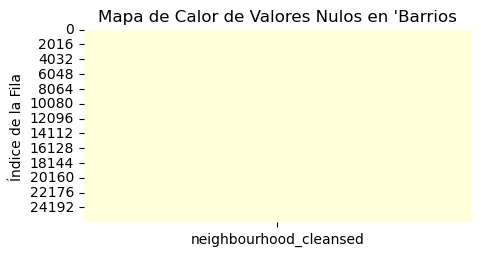

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['neighbourhood_cleansed'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Barrios")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()


C:\Users\fcapo\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.draw()
C:\Users\fcapo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


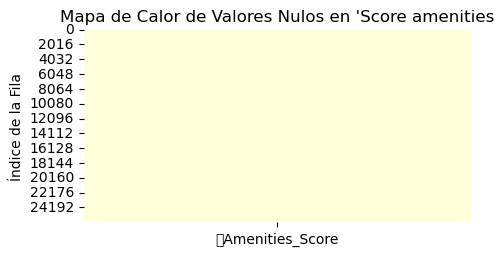

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['⭐Amenities_Score'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Score amenities")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

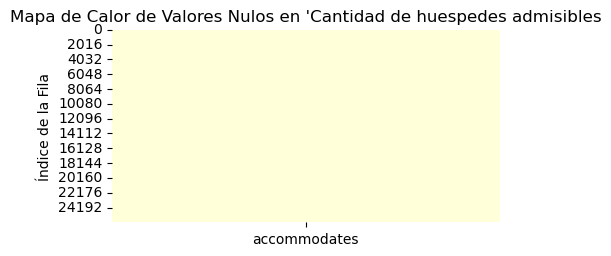

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['accommodates'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Cantidad de huespedes admisibles")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

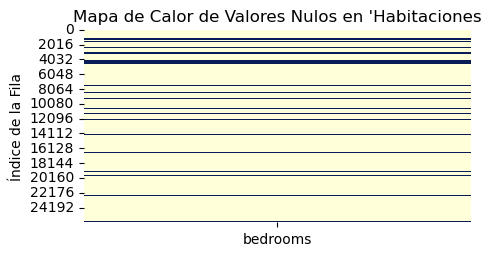

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['bedrooms'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Habitaciones")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

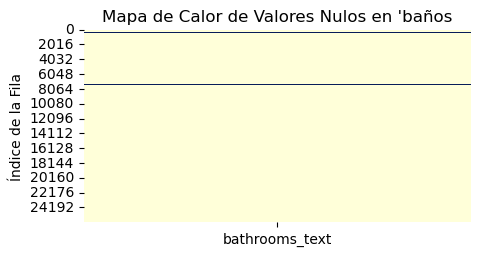

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['bathrooms_text'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'baños")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

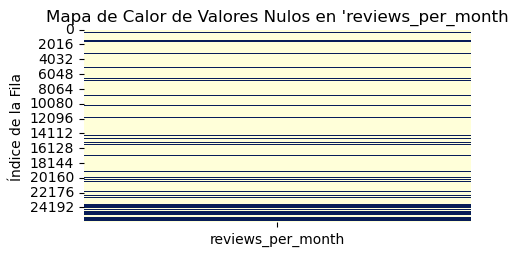

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['reviews_per_month'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'reviews_per_month")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()




In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


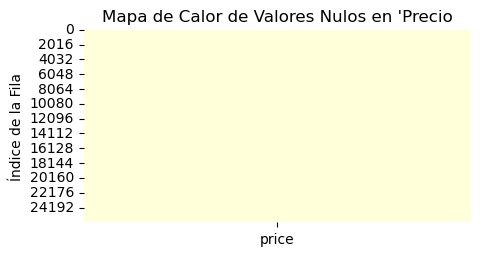

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['price'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Precio")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()




# Matriz de correlacion
#### Cuando hablamos de coeficientes de correlacion conocemos entre *+1* y *-1* representa la interaccion y direccion de la relacion entre dos variables. La idea es que aquellas caracteristicas con alta correlacion con la variable dependiente son predictores fuertes cuando se usan en un modelo

In [3]:
df_sucio.fillna(0, inplace=True)
nulos = df_sucio.isnull()
nulos
numero_nulos = nulos.sum()  # Esto te dará el número de valores nulos
print(numero_nulos)


id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64


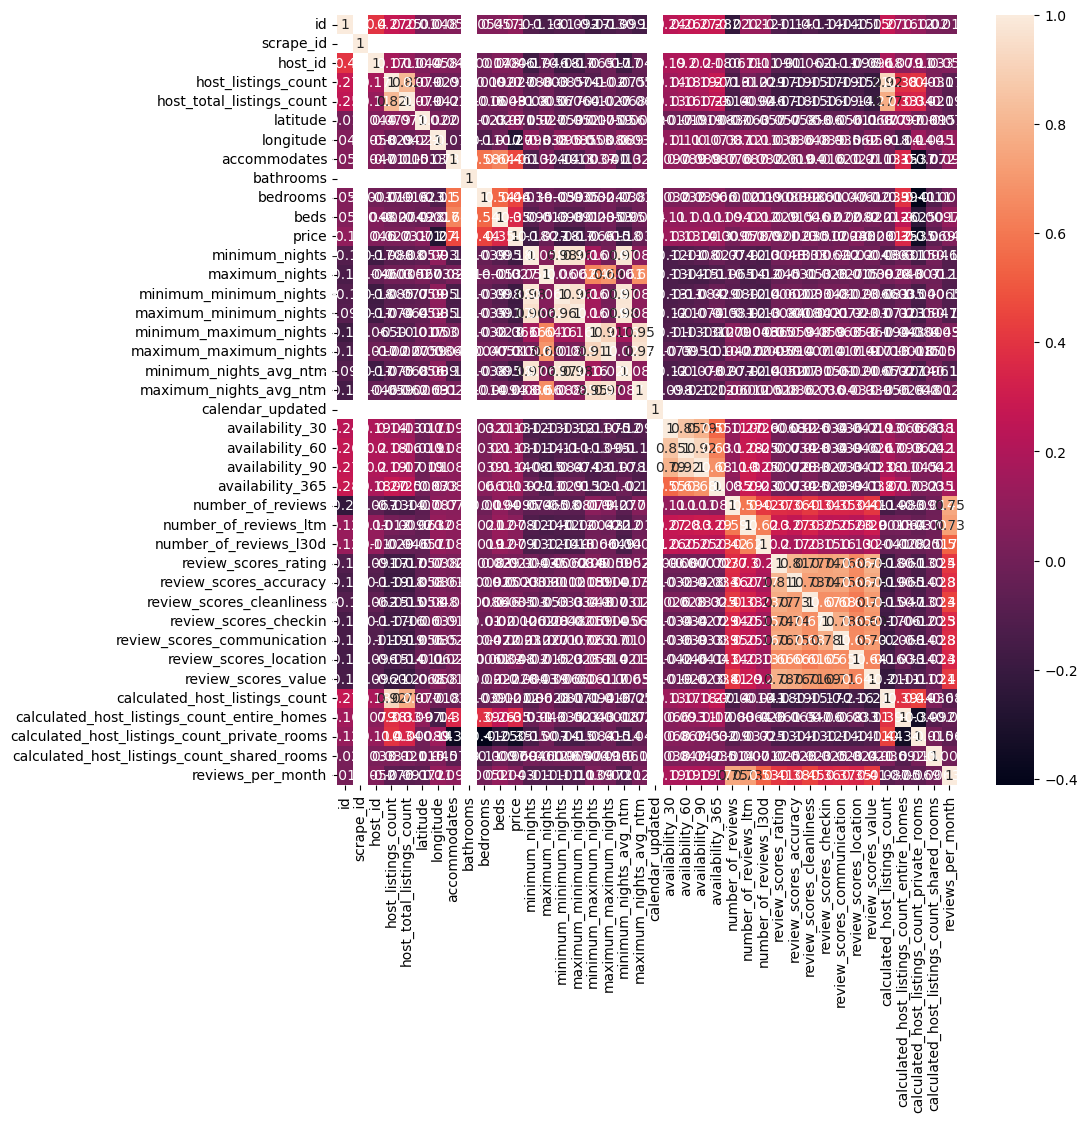

In [6]:
# Selecciona solo las columnas numéricas
df_numeric = df_sucio.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando el método 'kendall'
corr = df_numeric.corr(method='kendall')

# Crea una visualización de la matriz de correlación usando Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()


C:\Users\fcapo\AppData\Local\Temp\ipykernel_5880\3688849844.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


id                                              0.084687
scrape_id                                            NaN
host_id                                         0.059020
host_listings_count                             0.098980
host_total_listings_count                       0.115140
latitude                                        0.033363
longitude                                      -0.114221
accommodates                                    0.295535
bathrooms                                            NaN
bedrooms                                        0.220829
beds                                            0.219527
price                                           1.000000
minimum_nights                                 -0.041836
maximum_nights                                 -0.000891
minimum_minimum_nights                         -0.030463
maximum_minimum_nights                          0.004496
minimum_maximum_nights                          0.007425
maximum_maximum_nights         

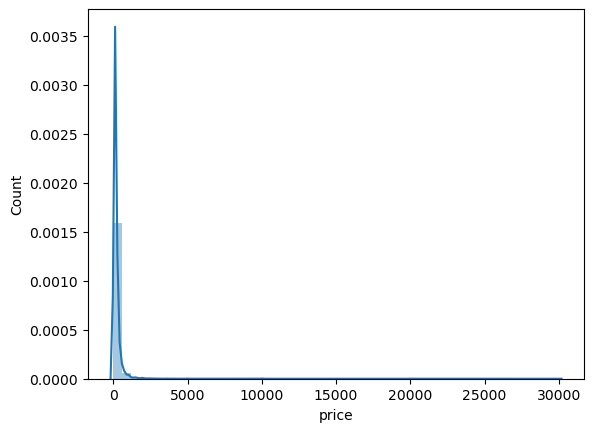

In [7]:
# Verifica si la columna 'price' contiene cadenas
if df_sucio['price'].dtype == 'object':
    # Aplica la operación de reemplazo solo si la columna es de tipo cadena
    df_sucio['price'] = df_sucio['price'].str.replace('[$,]', '', regex=True)

# Convierte la columna 'price' a tipo numérico
df_sucio['price'] = pd.to_numeric(df_sucio['price'])



sns.distplot(
    df_sucio['price'], norm_hist=False
).set(xlabel='price', ylabel='Count')
# Selecciona las columnas numéricas relevantes
numeric_columns = df_sucio.select_dtypes(include=['number'])

# Calcula la correlación de la columna 'price' con las otras columnas numéricas
correlation_with_price = numeric_columns.corr()['price']

# Imprime la correlación
print(correlation_with_price)


# Aqui visualizamos la distribucion de valores nulos por columnas

In [8]:
nulos = df.isnull()
nulos

numero_nulos = nulos.sum()  # Esto te dará el número de valores nulos
print(numero_nulos)


host_response_rate                13174
host_acceptance_rate              11904
host_total_listings_count             5
host_identity_verified                5
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms_text                      109
bedrooms                          16900
beds                                663
price                                 0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
calendar_last_scraped                 0
number_of_reviews                     0
number_of_reviews_ltm                 0
first_review                      10352
last_review                       10352
review_scores_rating              10347


# Clasificacion 

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
#Supongamos que tienes un DataFrame llamado X_train y deseas imputar valores nulos en las columnas 'columna1' y 'columna2' con la media.
imputer = SimpleImputer(strategy='mean')

# Lista de las columnas que deseas imputar
columns_to_impute = ['review_scores_rating','⭐Amenities_Score', 'bathrooms_text', 'bedrooms']

# Aplica la imputación solo a las columnas seleccionadas
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


In [320]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [321]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper = 1.5*(IQR) + Q3

upper
df.shape

(38792, 28)

In [322]:
df = df[df['price'] <= upper]
df.head(3)
df.shape

(35695, 28)

In [323]:

# Contar valores nulos en la columna "Bedrooms"
df

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,availability_30,availability_60,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone
0,0.0,0.0,2.0,0.0,Bushwick,Brooklyn,40.68457,-73.91181,Private room in rental unit,Private room,1,1.0,0.0,1.0,65.0,29,59,2023-10-02,5,0,2016-08-14,2018-04-30,4.80,4.80,1,0.06,3,Otro
1,0.0,0.0,1.0,1.0,Hell's Kitchen,Manhattan,40.76878,-73.98719,Private room in rental unit,Private room,2,1.0,1.0,1.0,110.0,0,0,2023-10-02,0,0,0,0,0.00,0.00,1,0.00,2,Otro
2,0.0,0.0,1.0,0.0,Sunnyside,Queens,40.74343,-73.91865,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,99.0,0,0,2023-10-02,0,0,0,0,0.00,0.00,1,0.00,2,Otro
3,0.0,0.0,2.0,1.0,Bedford-Stuyvesant,Brooklyn,40.68180,-73.93121,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,70.0,0,0,2023-10-02,2,0,2018-01-07,2019-01-20,5.00,5.00,1,0.03,2,Otro
4,0.0,100.0,1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.68209,-73.94279,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,170.0,3,20,2023-10-01,88,14,2017-12-30,2023-06-20,4.98,4.94,1,1.26,5,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,100.0,94.0,6.0,1.0,Bedford-Stuyvesant,Brooklyn,40.69448,-73.93722,Private room in rental unit,Private room,1,1.0,0.0,1.0,95.0,0,29,2023-10-01,18,4,2019-05-08,2023-06-08,4.78,4.61,1,0.34,3,Otro
38788,0.0,0.0,3.0,1.0,Upper West Side,Manhattan,40.80243,-73.96719,Private room in rental unit,Private room,2,1.0,0.0,1.0,75.0,0,0,2023-10-01,1,0,2016-03-28,2016-03-28,5.00,5.00,2,0.01,2,Otro
38789,0.0,0.0,3.0,1.0,Upper West Side,Manhattan,40.80213,-73.96626,Private room in rental unit,Private room,2,1.0,0.0,1.0,85.0,0,0,2023-10-01,7,0,2015-12-04,2016-04-02,5.00,5.00,2,0.07,2,Otro
38790,90.0,100.0,6.0,1.0,Long Island City,Queens,40.75374,-73.92452,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,145.0,0,0,2023-10-02,5,2,2021-11-15,2023-08-14,5.00,4.60,2,0.22,5,Otro


In [324]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [76]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#columns that will be used for prediction

df_new = df[[ 'latitude','neighbourhood_cleansed','neighbourhood_group_cleansed',
       'longitude', 'room_type', 'price','review_scores_rating','property_type',
       'number_of_reviews', 'accommodates','bathrooms_text','bedrooms','beds', 'calculated_host_listings_count','host_total_listings_count','number_of_reviews','review_scores_rating','review_scores_cleanliness']]
df_new.head()

,latitude,neighbourhood_cleansed,neighbourhood_group_cleansed,longitude,room_type,price,review_scores_rating,property_type,number_of_reviews,accommodates,bathrooms_text,bedrooms,beds,calculated_host_listings_count,host_total_listings_count,number_of_reviews,review_scores_rating,review_scores_cleanliness
0,40.68457,Bushwick,Brooklyn,-73.91181,Private room,65.0,4.80,Private room in rental unit,5,1,1.0,0.0,1.0,1,2.0,5,4.80,5.00
1,40.76878,Hell's Kitchen,Manhattan,-73.98719,Private room,110.0,0.00,Private room in rental unit,0,2,1.0,1.0,1.0,1,1.0,0,0.00,0.00
2,40.74343,Sunnyside,Queens,-73.91865,Entire home/apt,99.0,0.00,Entire rental unit,0,1,1.0,0.0,1.0,1,1.0,0,0.00,0.00
3,40.68180,Bedford-Stuyvesant,Brooklyn,-73.93121,Entire home/apt,70.0,5.00,Entire rental unit,2,2,1.0,1.0,1.0,1,2.0,2,5.00,5.00
4,40.68209,Bedford-Stuyvesant,Brooklyn,-73.94279,Entire home/apt,170.0,4.98,Entire rental unit,88,4,1.0,1.0,2.0,1,1.0,88,4.98,4.99


In [77]:
# Subset all categorical variables
df_categorical = df_new.select_dtypes(include=['object'])
df_categorical.head()

,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,property_type
0,Bushwick,Brooklyn,Private room,Private room in rental unit
1,Hell's Kitchen,Manhattan,Private room,Private room in rental unit
2,Sunnyside,Queens,Entire home/apt,Entire rental unit
3,Bedford-Stuyvesant,Brooklyn,Entire home/apt,Entire rental unit
4,Bedford-Stuyvesant,Brooklyn,Entire home/apt,Entire rental unit


In [78]:
#convert to dummies

df_dummies = pd.get_dummies(df_new[['room_type','neighbourhood_group_cleansed']], drop_first = True)
df_dummies = df_dummies.astype(int)

df_dummies.head(80)

,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,0,1,0,1,0,0,0
1,0,1,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
75,0,1,0,0,0,1,0
76,0,0,0,0,1,0,0
77,0,0,0,1,0,0,0
78,0,0,0,1,0,0,0


In [79]:
df_new = df_new.drop(list(df_categorical.columns),axis = 1)
df_new


,latitude,longitude,price,review_scores_rating,number_of_reviews,accommodates,bathrooms_text,bedrooms,beds,calculated_host_listings_count,host_total_listings_count,number_of_reviews,review_scores_rating,review_scores_cleanliness
0,40.68457,-73.91181,65.0,4.80,5,1,1.0,0.0,1.0,1,2.0,5,4.80,5.00
1,40.76878,-73.98719,110.0,0.00,0,2,1.0,1.0,1.0,1,1.0,0,0.00,0.00
2,40.74343,-73.91865,99.0,0.00,0,1,1.0,0.0,1.0,1,1.0,0,0.00,0.00
3,40.68180,-73.93121,70.0,5.00,2,2,1.0,1.0,1.0,1,2.0,2,5.00,5.00
4,40.68209,-73.94279,170.0,4.98,88,4,1.0,1.0,2.0,1,1.0,88,4.98,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,40.69448,-73.93722,95.0,4.78,18,1,1.0,0.0,1.0,1,6.0,18,4.78,4.89
38788,40.80243,-73.96719,75.0,5.00,1,2,1.0,0.0,1.0,2,3.0,1,5.00,5.00
38789,40.80213,-73.96626,85.0,5.00,7,2,1.0,0.0,1.0,2,3.0,7,5.00,5.00
38790,40.75374,-73.92452,145.0,5.00,5,2,1.0,1.0,1.0,2,6.0,5,5.00,4.80


In [80]:
# Concatenate dummy variables with X
df_new = pd.concat([df, df_dummies], axis=1)
df_new

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,0.0,0.0,2.0,0.0,Bushwick,Brooklyn,40.68457,-73.91181,Private room in rental unit,Private room,...,1,0.06,3,0,1,0,1,0,0,0
1,0.0,0.0,1.0,1.0,Hell's Kitchen,Manhattan,40.76878,-73.98719,Private room in rental unit,Private room,...,1,0.00,2,0,1,0,0,1,0,0
2,0.0,0.0,1.0,0.0,Sunnyside,Queens,40.74343,-73.91865,Entire rental unit,Entire home/apt,...,1,0.00,2,0,0,0,0,0,1,0
3,0.0,0.0,2.0,1.0,Bedford-Stuyvesant,Brooklyn,40.68180,-73.93121,Entire rental unit,Entire home/apt,...,1,0.03,2,0,0,0,1,0,0,0
4,0.0,100.0,1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.68209,-73.94279,Entire rental unit,Entire home/apt,...,1,1.26,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,100.0,94.0,6.0,1.0,Bedford-Stuyvesant,Brooklyn,40.69448,-73.93722,Private room in rental unit,Private room,...,1,0.34,3,0,1,0,1,0,0,0
38788,0.0,0.0,3.0,1.0,Upper West Side,Manhattan,40.80243,-73.96719,Private room in rental unit,Private room,...,2,0.01,2,0,1,0,0,1,0,0
38789,0.0,0.0,3.0,1.0,Upper West Side,Manhattan,40.80213,-73.96626,Private room in rental unit,Private room,...,2,0.07,2,0,1,0,0,1,0,0
38790,90.0,100.0,6.0,1.0,Long Island City,Queens,40.75374,-73.92452,Entire rental unit,Entire home/apt,...,2,0.22,5,0,0,0,0,0,1,0


In [81]:
df_new.dtypes


host_response_rate                            float64
host_acceptance_rate                          float64
host_total_listings_count                     float64
host_identity_verified                        float64
neighbourhood_cleansed                         object
neighbourhood_group_cleansed                   object
latitude                                      float64
longitude                                     float64
property_type                                  object
room_type                                      object
accommodates                                    int64
bathrooms_text                                float64
bedrooms                                      float64
beds                                          float64
price                                         float64
availability_30                                 int64
availability_60                                 int64
availability_90                                 int64
availability_365            

In [82]:
# Subset all numerical variables
df_numerical = df_new.select_dtypes(include=['float64', 'int64'])
df_numerical.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_cleanliness,review_scores_location,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score
0,0.0,0.0,2.0,0.0,40.68457,-73.91181,1,1.0,0.0,1.0,...,89,364,5,0,4.80,5.00,4.80,1,0.06,3
1,0.0,0.0,1.0,1.0,40.76878,-73.98719,2,1.0,1.0,1.0,...,0,0,0,0,0.00,0.00,0.00,1,0.00,2
2,0.0,0.0,1.0,0.0,40.74343,-73.91865,1,1.0,0.0,1.0,...,0,0,0,0,0.00,0.00,0.00,1,0.00,2
3,0.0,0.0,2.0,1.0,40.68180,-73.93121,2,1.0,1.0,1.0,...,0,0,2,0,5.00,5.00,5.00,1,0.03,2
4,0.0,100.0,1.0,1.0,40.68209,-73.94279,4,1.0,1.0,2.0,...,35,96,88,14,4.98,4.99,4.94,1,1.26,5


In [83]:
df_numerical.describe()



,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_cleanliness,review_scores_location,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score
count,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,...,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000
mean,61.124252,56.452542,228.401578,0.877397,40.729379,-73.945829,2.907249,1.175152,0.898098,1.622010,...,32.854300,148.752629,25.356285,6.946896,3.392029,3.341587,3.412735,38.581563,0.790881,3.087209
std,46.381575,43.751468,977.746306,0.327985,0.056725,0.055115,2.101448,0.509940,1.079718,1.179234,...,34.845199,142.257519,55.852480,16.626580,2.142742,2.123521,2.145512,113.306079,1.492660,1.264568
min,0.000000,0.000000,0.000000,0.000000,40.500314,-74.251907,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,40.688790,-73.982820,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,94.000000,79.000000,3.000000,1.000000,40.726290,-73.953886,2.000000,1.000000,1.000000,1.000000,...,20.000000,120.000000,4.000000,0.000000,4.670000,4.600000,4.670000,1.000000,0.160000,3.000000
75%,100.000000,98.000000,10.000000,1.000000,40.762672,-73.926209,4.000000,1.000000,1.000000,2.000000,...,64.000000,300.000000,24.000000,5.000000,4.940000,4.910000,4.960000,6.000000,0.970000,4.000000
max,100.000000,100.000000,8820.000000,1.000000,40.911380,-73.713650,16.000000,15.500000,50.000000,42.000000,...,90.000000,365.000000,1843.000000,814.000000,5.000000,5.000000,5.000000,602.000000,62.820000,5.000000


In [84]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_new['neighbourhood_group_cleansed'] = labelencoder.fit_transform(df_new['neighbourhood_group_cleansed'])
df_new['neighbourhood_cleansed'] = labelencoder.fit_transform(df_new['neighbourhood_cleansed'])
df_new['property_type'] = labelencoder.fit_transform(df_new['property_type'])


In [85]:
df_new['price'] = np.where(df_new['price'] < 0, 1, df_new['price'])


In [86]:
# Verifica si los datos en la columna 'price' son constantes
# Calcular el valor promedio de la columna 'price'
mean_price = df_new['price'].mean()

# Reemplazar los valores igual a 0 por el valor promedio
df_new.loc[df_new['price'] == 0, 'price'] = 215.945893


is_constant = df_new['price'].nunique() == 1
if is_constant:
    print("La columna 'price' es constante. Revise sus datos.")
else:
    print("La columna 'price' no es constante. Puede continuar con la transformación de Box-Cox.")
    
# Imprime estadísticas descriptivas para la columna 'price'
print(df_new['price'].describe())



La columna 'price' no es constante. Puede continuar con la transformación de Box-Cox.
count    38792.000000
mean       215.951458
std        496.012400
min          8.000000
25%         79.000000
50%        135.000000
75%        225.000000
max      30000.000000
Name: price, dtype: float64


In [87]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')



# Aplica la transformación de Box-Cox
df_new['price'], price_lambda = boxcox(df_new['price'])
print('"price lambda": {}'.format(price_lambda))




values = df_new['calculated_host_listings_count'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)
df_new['calculated_host_listings_count']= boxcox1p(df_new['calculated_host_listings_count'],pt.lambdas_)
print('"calculated_host_listings_count lambda: {}"'.format(pt.lambdas_))






values = df_new['beds'].values
data4 = pd.DataFrame({'x':values})
pt.fit(data4)
print(pt.lambdas_)
df_new['beds']= boxcox1p(df_new['beds'],pt.lambdas_)
print('"beds lambda: {}"'.format(pt.lambdas_))



values = df_new['bedrooms'].values
data6 = pd.DataFrame({'x':values})
pt.fit(data6)
print(pt.lambdas_)
df_new['bedrooms']= boxcox1p(df_new['bedrooms'],pt.lambdas_)
print('"bedrooms lambda: {}"'.format(pt.lambdas_))





values = df_new['accommodates'].values
data5 = pd.DataFrame({'x':values})
pt.fit(data5)
print(pt.lambdas_)
df_new['accommodates']= boxcox1p(df_new['accommodates'],pt.lambdas_)
print('"accommodates lambda: {}"'.format(pt.lambdas_))



values = df_new['bathrooms_text'].values
data7 = pd.DataFrame({'x':values})
pt.fit(data7)
print(pt.lambdas_)
df_new['bathrooms_text']= boxcox1p(df_new['bathrooms_text'],pt.lambdas_)
print('"bathrooms_text lambda: {}"'.format(pt.lambdas_))


values = df_new['host_total_listings_count'].values
data23 = pd.DataFrame({'x':values})
pt.fit(data23)
print(pt.lambdas_)
df_new['host_total_listings_count']= boxcox1p(df_new['host_total_listings_count'],pt.lambdas_)
print('"host_total_listings_count lambda: {}"'.format(pt.lambdas_))

values = df_new['review_scores_location'].values
data9= pd.DataFrame({'x':values})
pt.fit(data9)
print(pt.lambdas_)
df_new['review_scores_location']= boxcox1p(df_new['review_scores_location'],pt.lambdas_)
print('"review_scores_location lambda: {}"'.format(pt.lambdas_))


values = df_new['availability_30'].values
data30= pd.DataFrame({'x':values})
pt.fit(data30)
print(pt.lambdas_)
df_new['availability_30']= boxcox1p(df_new['availability_30'],pt.lambdas_)
print('"availability_30 lambda: {}"'.format(pt.lambdas_))

values = df_new['availability_60'].values
data60= pd.DataFrame({'x':values})
pt.fit(data60)
print(pt.lambdas_)
df_new['availability_60']= boxcox1p(df_new['availability_60'],pt.lambdas_)
print('"availability_60 lambda: {}"'.format(pt.lambdas_))


values = df_new['availability_90'].values
data99= pd.DataFrame({'x':values})
pt.fit(data99)
print(pt.lambdas_)
df_new['availability_90']= boxcox1p(df_new['availability_90'],pt.lambdas_)
print('"availability_90 lambda: {}"'.format(pt.lambdas_))


values = df_new['availability_365'].values
data360= pd.DataFrame({'x':values})
pt.fit(data360)
print(pt.lambdas_)
df_new['availability_365']= boxcox1p(df_new['availability_365'],pt.lambdas_)
print('"availability_365 lambda: {}"'.format(pt.lambdas_))

values = df_new['number_of_reviews'].values
data3600= pd.DataFrame({'x':values})
pt.fit(data3600)
print(pt.lambdas_)
df_new['number_of_reviews']= boxcox1p(df_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))

values = df_new['review_scores_rating'].values
data36000= pd.DataFrame({'x':values})
pt.fit(data36000)
print(pt.lambdas_)
df_new['review_scores_rating ']= boxcox1p(df_new['review_scores_rating'],pt.lambdas_)
print('"review_scores_rating lambda: {}"'.format(pt.lambdas_))
 
          
values = df_new['review_scores_cleanliness'].values
data360000= pd.DataFrame({'x':values})
pt.fit(data360000)
print(pt.lambdas_)
df_new['review_scores_cleanliness ']= boxcox1p(df_new['review_scores_cleanliness'],pt.lambdas_)
print('"review_scores_cleanliness lambda: {}"'.format(pt.lambdas_ ))     

"price lambda": -0.24220187171365656
[-0.76563013]
"calculated_host_listings_count lambda: [-0.76563013]"
[-0.75694282]
"beds lambda: [-0.75694282]"
[-0.51309427]
"bedrooms lambda: [-0.51309427]"
[-0.72610806]
"accommodates lambda: [-0.72610806]"
[-0.4715163]
"bathrooms_text lambda: [-0.4715163]"
[-0.51468922]
"host_total_listings_count lambda: [-0.51468922]"
[1.61346676]
"review_scores_location lambda: [1.61346676]"
[-0.46316184]
"availability_30 lambda: [-0.46316184]"
[-0.06648144]
"availability_60 lambda: [-0.06648144]"
[0.07489489]
"availability_90 lambda: [0.07489489]"
[0.2087584]
"availability_365 lambda: [0.2087584]"
[-0.17522571]
"number_of_reviews lambda: [-0.17522571]"
[1.58247498]
"review_scores_rating lambda: [1.58247498]"
[1.5406386]
"review_scores_cleanliness lambda: [1.5406386]"


In [88]:
df_new

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,⭐Amenities_Score,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,review_scores_rating,review_scores_cleanliness
0,0.0,0.0,0.839132,0.0,27,1,40.68457,-73.91181,49,Private room,...,3,0,1,0,1,0,0,0,9.572041,9.610959
1,0.0,0.0,0.582985,1.0,97,2,40.76878,-73.98719,49,Private room,...,2,0,1,0,0,1,0,0,0.000000,0.000000
2,0.0,0.0,0.582985,0.0,191,3,40.74343,-73.91865,16,Entire home/apt,...,2,0,0,0,0,0,1,0,0.000000,0.000000
3,0.0,0.0,0.839132,1.0,12,1,40.68180,-73.93121,16,Entire home/apt,...,2,0,0,0,1,0,0,0,10.134417,9.610959
4,0.0,100.0,0.582985,1.0,12,1,40.68209,-73.94279,16,Entire home/apt,...,5,0,0,0,1,0,0,0,10.077681,9.584626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,100.0,94.0,1.229259,1.0,12,1,40.69448,-73.93722,49,Private room,...,3,0,1,0,1,0,0,0,9.516416,9.322604
38788,0.0,0.0,0.991042,1.0,204,2,40.80243,-73.96719,49,Private room,...,2,0,1,0,0,1,0,0,10.134417,9.610959
38789,0.0,0.0,0.991042,1.0,204,2,40.80213,-73.96626,49,Private room,...,2,0,1,0,0,1,0,0,10.134417,9.610959
38790,90.0,100.0,1.229259,1.0,119,3,40.75374,-73.92452,16,Entire home/apt,...,5,0,0,0,0,0,1,0,10.134417,9.088831


In [89]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

columns_to_remove = ['number_of_reviews_ltm','host_response_rate', 'host_acceptance_rate', 'host_identity_verified',

      'room_type','calendar_last_scraped', 'reviews_per_month', '⭐Amenities_Score','first_review',
      'last_review' ]
df_new.drop(columns=columns_to_remove, inplace=True)
df_train, df_test = train_test_split(df_new, train_size=0.75, test_size=0.25, random_state=42)


In [90]:
df_new.columns

Index(['host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_location',
       'calculated_host_listings_count', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island', 'review_scores_rating ',
       'review_scores_cleanliness '],
      dtype='object')

In [55]:
# Let's take a look at the train dataframe now
df_train.head()

,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,...,calculated_host_listings_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,review_scores_rating,review_scores_cleanliness
7451,0.582985,216,1,40.718320,-73.956020,16,1.041957,0.857441,0.992009,0.858497,...,0.537862,0,0,0,1,0,0,0,10.134417,7.098379
33795,1.170330,52,1,40.670843,-73.940798,55,0.544640,0.591271,0.000000,0.539342,...,0.742888,0,1,0,1,0,0,0,10.134417,7.098379
3740,0.582985,12,1,40.692690,-73.955610,8,0.873893,0.857441,0.839798,0.745951,...,0.537862,0,0,0,1,0,0,0,9.964539,9.610959
30044,1.276659,24,1,40.700678,-73.993102,16,0.949179,0.591271,0.839798,0.858497,...,0.925198,0,0,0,1,0,0,0,9.572041,9.400960
7209,0.582985,65,2,40.728790,-73.979590,49,0.756969,0.591271,0.583289,0.539342,...,0.537862,0,1,0,0,1,0,0,7.436075,9.610959


In [56]:
# Split the train dataset into X and y
y_train = df_train.pop('price')
X_train = df_train
X_train 

,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,...,calculated_host_listings_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,review_scores_rating,review_scores_cleanliness
7451,0.582985,216,1,40.718320,-73.956020,16,1.041957,0.857441,0.992009,0.858497,...,0.537862,0,0,0,1,0,0,0,10.134417,7.098379
33795,1.170330,52,1,40.670843,-73.940798,55,0.544640,0.591271,0.000000,0.539342,...,0.742888,0,1,0,1,0,0,0,10.134417,7.098379
3740,0.582985,12,1,40.692690,-73.955610,8,0.873893,0.857441,0.839798,0.745951,...,0.537862,0,0,0,1,0,0,0,9.964539,9.610959
30044,1.276659,24,1,40.700678,-73.993102,16,0.949179,0.591271,0.839798,0.858497,...,0.925198,0,0,0,1,0,0,0,9.572041,9.400960
7209,0.582985,65,2,40.728790,-73.979590,49,0.756969,0.591271,0.583289,0.539342,...,0.537862,0,1,0,0,1,0,0,7.436075,9.610959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.094321,7,1,40.625629,-74.028969,55,0.544640,0.591271,0.000000,0.539342,...,0.925198,0,1,0,1,0,0,0,10.077681,9.479531
11284,0.991042,12,1,40.687770,-73.958700,49,0.756969,0.591271,0.000000,0.539342,...,0.537862,0,1,0,1,0,0,0,8.749498,6.509707
38158,1.847908,191,3,40.740060,-73.927640,55,0.756969,0.591271,0.000000,0.539342,...,1.287456,0,1,0,0,0,1,0,0.000000,0.000000
860,1.170330,74,2,40.705680,-74.010750,16,0.756969,0.591271,0.583289,0.539342,...,0.537862,0,0,0,0,1,0,0,8.749498,7.580952


In [57]:

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.68524619e-02  1.86650524e-04 -3.89063580e-02 -3.89822615e-01
 -8.51592479e-01  1.85447463e-03  4.62625049e-01  4.90374239e-02
  9.17458397e-02  5.20315027e-02  3.47781202e-02  6.01482468e-03
  1.94453656e-03  3.07344069e-03  1.57756281e-03 -1.36476744e-01
 -1.31165623e-01  9.36779084e-03 -9.20929595e-02  1.06874120e-01
 -1.37983821e-01 -2.18738719e-01 -1.47772801e-02  1.51022216e-01
  1.04410468e-01 -1.59851229e-01  5.24473272e-02  7.43561932e-02]
-44.73102783026168


In [59]:
# Supongamos que tienes una Serie o una lista llamada 'price_values' con los valores de 'price' que deseas insertar
# Si no tienes 'price_values', puedes asignar un valor constante a 'price' para todas las filas, por ejemplo, 0.

df_test['price'] =df_new['price']  # O df_test['price'] = 0 si es un valor constante


y_test = df_test.pop('price')
X_test = df_test

X_test

,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,...,calculated_host_listings_count,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,review_scores_rating,review_scores_cleanliness
4029,0.839132,93,1,40.731916,-73.960759,16,0.756969,0.591271,0.583289,0.539342,...,0.537862,0,0,0,1,0,0,0,10.134417,9.610959
3885,1.094321,69,3,40.736640,-73.874570,16,0.949179,0.591271,0.583289,0.745951,...,0.537862,0,0,0,0,0,1,0,10.049354,9.244464
16000,1.094321,160,1,40.677520,-73.967300,18,1.097877,0.857441,1.095535,0.930392,...,0.537862,0,0,0,1,0,0,0,9.488645,8.652599
31091,1.094321,139,2,40.745390,-73.973970,8,1.072936,0.857441,0.839798,0.858497,...,0.854231,0,0,0,0,1,0,0,8.507727,8.098565
19492,1.764965,129,2,40.748679,-73.982427,16,0.756969,0.591271,0.583289,0.539342,...,0.742888,0,0,0,0,1,0,0,10.134417,7.098379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29887,0.839132,12,1,40.683460,-73.937100,49,0.756969,0.857441,0.000000,0.539342,...,0.537862,0,1,0,1,0,0,0,10.134417,9.088831
20301,0.582985,29,1,40.650000,-73.898360,17,0.756969,0.591271,0.583289,0.539342,...,0.537862,0,0,0,1,0,0,0,9.544214,8.934066
15232,1.809121,74,2,40.708489,-74.014958,16,0.756969,0.591271,0.000000,0.539342,...,0.742888,0,0,0,0,1,0,0,0.000000,0.000000
38014,1.904860,27,1,40.692318,-73.926147,49,0.544640,0.000000,0.000000,0.539342,...,1.293510,0,1,0,1,0,0,0,0.000000,0.000000


In [60]:

predicts = lm.predict(X_test)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 0.15517606595952707
        R2 Score: 57.72466765736226
        Mean Absolute Error: 0.11740426503456908
     


In [61]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 0.15517606595952707
        R2 Score: 0.5772466765736226
        Mean Absolute Error: 0.11740426503456908
     


In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score


# Entrenar el modelo de Random Forest
rfr_reg =  RandomForestRegressor(random_state=42)
rfr_reg.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
rfr_pred_test = rfr_reg.predict(X_test)

# Calcular el RMSE en los datos de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, rfr_pred_test))
print(f"RMSE en los datos de prueba: {rmse_test}")
# Calcular R² en los datos de prueba
r2_test = r2_score(y_test, rfr_pred_test)
print(f"Coeficiente de determinación (R²) en los datos de prueba: {r2_test}")


rfr_pred_train = rfr_reg.predict(X_train)

# Calcular R² en los datos de entrenamiento
r2_train = r2_score(y_train, rfr_pred_train)
print(f"Coeficiente de determinación (R²) en los datos de entrenamiento: {r2_train}")

RMSE en los datos de prueba: 0.1252882839810446
Coeficiente de determinación (R²) en los datos de prueba: 0.7244131584083576
Coeficiente de determinación (R²) en los datos de entrenamiento: 0.9614875473390291


In [ ]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y_test, x=predictions, color='blue')
plt.title('Linear Regression Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

In [52]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (31033, 28)
Dimensions of the training target vector: (31033,)
Dimensions of the test feature matrix: (7759, 28)
Dimensions of the test target vector: (7759,)


In [26]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear un modelo XGBoost para regresión
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar el modelo en los datos de entrenamiento
xgb_reg.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
xgb_pred_test = xgb_reg.predict(X_test)

# Calcular el RMSE en los datos de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))

# Calcular el R² en los datos de prueba
r2_test = r2_score(y_test, xgb_pred_test)

# Realizar predicciones en los datos de entrenamiento
xgb_pred_train = xgb_reg.predict(X_train)
# Calcular el R² en los datos de entrenamiento
r2_train = r2_score(y_train, xgb_pred_train)


print(f"RMSE en los datos de prueba (XGBoost): {rmse_test}")
print(f"Coeficiente de determinación (R²) en los datos de prueba (XGBoost): {r2_test}")
print(f"Coeficiente de determinación (R²) en los datos de entrenamiento (XGBoost): {r2_train}")


RMSE en los datos de prueba (XGBoost): 0.12523734473597167
Coeficiente de determinación (R²) en los datos de prueba (XGBoost): 0.7252461400537585
Coeficiente de determinación (R²) en los datos de entrenamiento (XGBoost): 0.8210082126637028


C:\Users\fcapo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


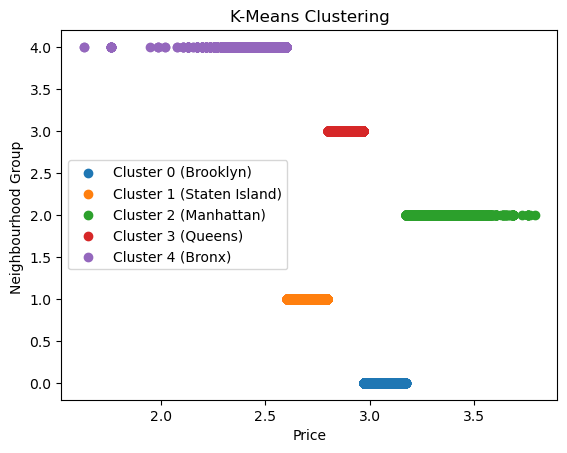

In [125]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos.

# Selecciona las columnas 'price' y 'neighbourhood_group_cleansed'
X = df_new[['price', 'neighbourhood_group_cleansed']]

# Escala las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define el número de clústeres que deseas obtener
n_clusters = 5  # Puedes ajustar este valor según tus necesidades

# Aplica el algoritmo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

neighborhood_mapping = {
    0: 'Brooklyn',
    1: 'Staten Island',
    2: 'Manhattan',
    3: 'Queens',
    4: 'Bronx'
}

# Luego, en el bucle de trazado, usa el diccionario para obtener la etiqueta del vecindario
for cluster in range(n_clusters):
    neighborhood_label = neighborhood_mapping[cluster]
    plt.scatter(
        df_new[df_new['neighbourhood_group_cleansed'] == cluster]['price'],
        df_new[df_new['neighbourhood_group_cleansed'] == cluster]['neighbourhood_group_cleansed'],
        label=f'Cluster {cluster} ({neighborhood_label})',
    )

plt.xlabel('Price')
plt.ylabel('Neighbourhood Group ')
plt.title('K-Means Clustering')
plt.legend()
plt.show()



C:\Users\fcapo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


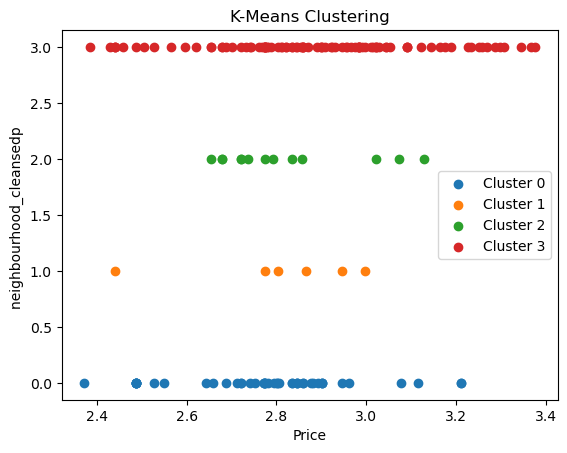

In [131]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos.

# Selecciona las columnas 'price' y 'neighbourhood_group_cleansed'
X = df_new[['price', 'neighbourhood_cleansed']]

# Escala las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define el número de clústeres que deseas obtener
n_clusters = 4  # Puedes ajustar este valor según tus necesidades

# Aplica el algoritmo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)



# Luego, en el bucle de trazado, usa el diccionario para obtener la etiqueta del vecindario
for cluster in range(n_clusters):
    plt.scatter(
        df_new[df_new['neighbourhood_cleansed'] == cluster]['price'],
        df_new[df_new['neighbourhood_cleansed'] == cluster]['neighbourhood_cleansed'],
        label=f'Cluster {cluster}',
    )

plt.xlabel('Price')
plt.ylabel('neighbourhood_cleansedp ')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


C:\Users\fcapo\AppData\Local\Temp\ipykernel_5880\3047935822.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  density_neigh_price_plot.set_yticklabels(ylabels)


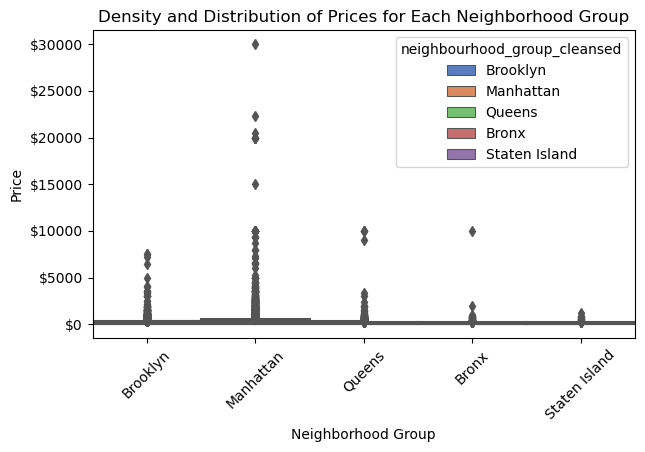

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusta el tamaño de la figura
fig, ax = plt.subplots(figsize=(7, 4))

# Crea un gráfico de caja (box plot)
density_neigh_price_plot = sns.boxplot(ax=ax, x="neighbourhood_group_cleansed", y="price", 
                                      hue="neighbourhood_group_cleansed", data=df, 
                                      palette="muted", dodge=False, width=2)

for patch in density_neigh_price_plot.artists:
    patch.set_edgecolor("black")  # Agrega bordes negros a las cajas
    patch.set_linewidth(20.0)  # Aumenta el grosor de los bordes
    patch.set_facecolor("none")  # Establece el color del relleno como "ninguno"

# Establece etiquetas y título
density_neigh_price_plot.set(xlabel='Neighborhood Group', ylabel='Price', 
                            title='Density and Distribution of Prices for Each Neighborhood Group')

# Rota las etiquetas del eje X para mejorar la legibilidad
density_neigh_price_plot.set_xticklabels(density_neigh_price_plot.get_xticklabels(), rotation=45)
# Ajusta el espaciado de las etiquetas del eje Y
ylabels = ['${:.0f}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)

plt.show()


In [67]:
df.groupby(["neighbourhood_group_cleansed"])['price'].mean()


neighbourhood_group_cleansed
Bronx            126.117176
Brooklyn         158.753312
Manhattan        302.438628
Queens           132.639603
Staten Island    131.352151
Name: price, dtype: float64

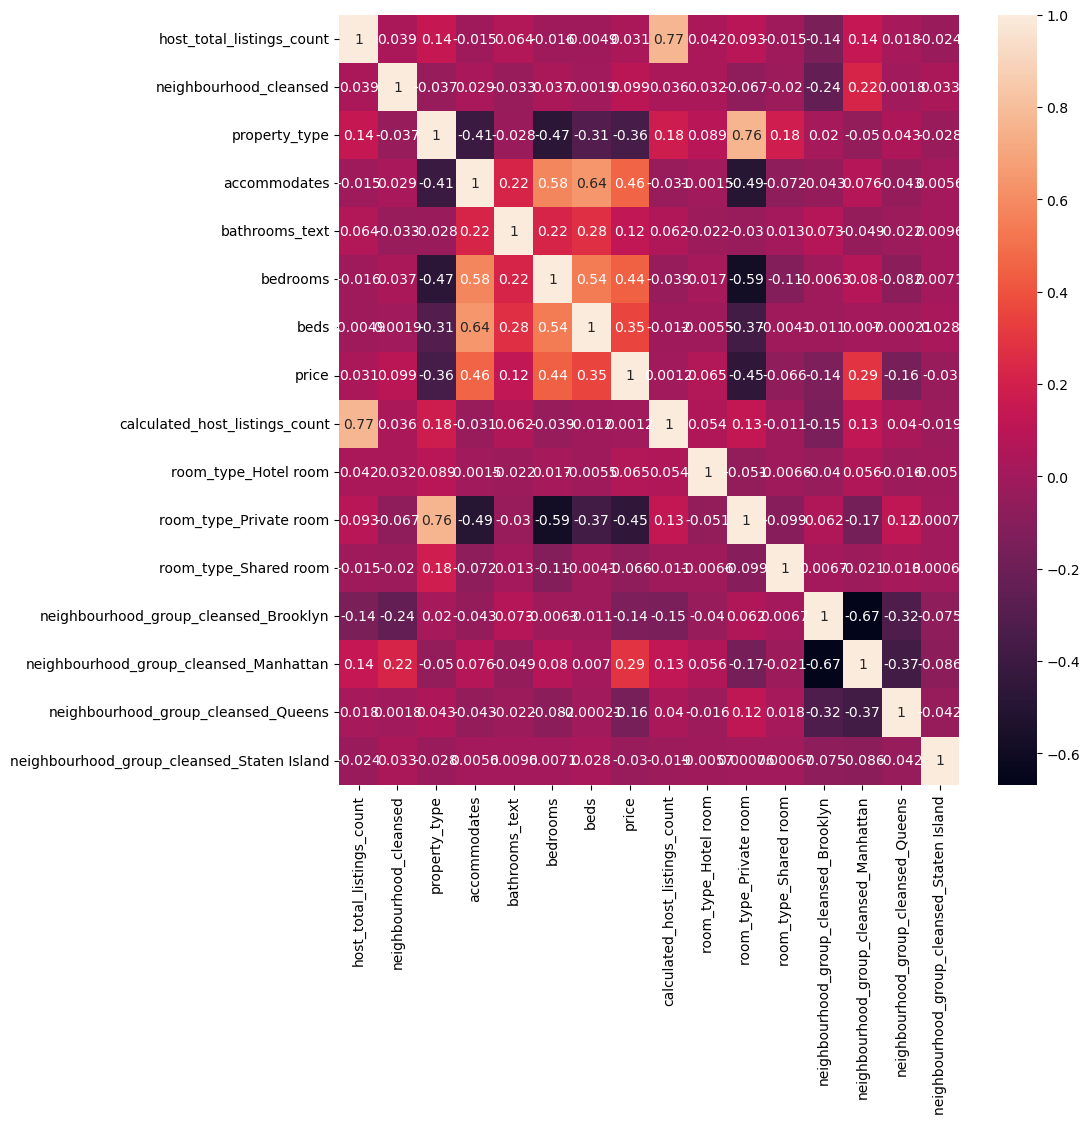

In [266]:
# Selecciona solo las columnas numéricas
df_numeric = df_new.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando el método 'kendall'
corr = df_numeric.corr(method='kendall')

# Crea una visualización de la matriz de correlación usando Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

C:\Users\fcapo\AppData\Local\Temp\ipykernel_25624\3743053335.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


host_total_listings_count                     0.049236
neighbourhood_cleansed                        0.133919
neighbourhood_group_cleansed                  0.051741
latitude                                      0.062829
longitude                                    -0.286678
property_type                                -0.457561
accommodates                                  0.585025
bathrooms_text                                0.179061
bedrooms                                      0.541137
beds                                          0.410678
price                                         1.000000
availability_30                               0.195439
availability_60                               0.199914
availability_90                               0.205106
availability_365                              0.195859
review_scores_location                       -0.006548
calculated_host_listings_count                0.016555
room_type_Hotel room                          0.078221
room_type_

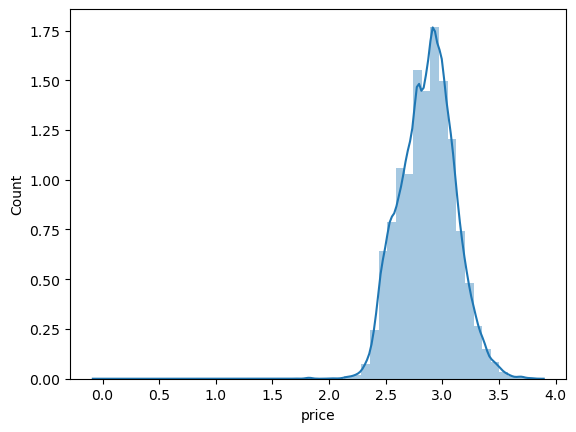

In [71]:






sns.distplot(
    df_new['price'], norm_hist=False
).set(xlabel='price', ylabel='Count')
# Selecciona las columnas numéricas relevantes
numeric_columns = df_new.select_dtypes(include=['number'])

# Calcula la correlación de la columna 'price' con las otras columnas numéricas
correlation_with_price = numeric_columns.corr()['price']

# Imprime la correlación
print(correlation_with_price)


970/970 [==============================] - 1s 1ms/step
Training MSE: 0.0372
Validation MSE: 0.038

Training r2: 0.3449
Validation r2: 0.3335


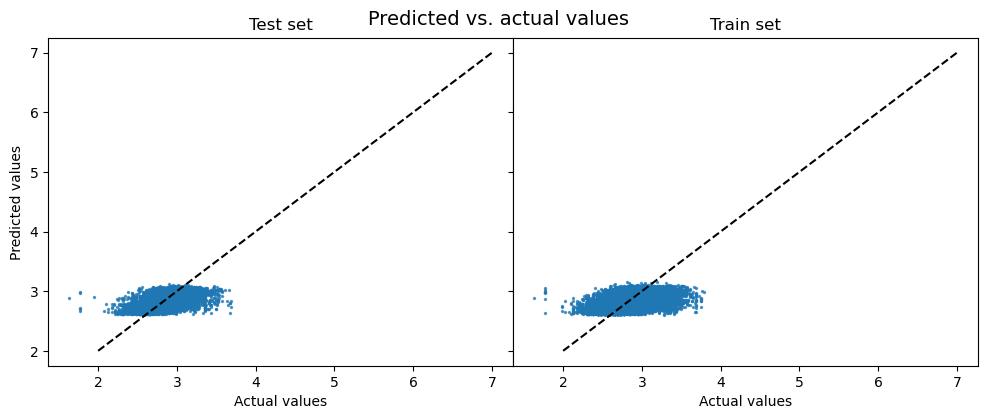

In [287]:
nn_model_evaluation(nn3)


In [288]:
# Building the model
nn4 = models.Sequential()
nn4.add(layers.Dense(13, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005),activation='relu'))
nn4.add(layers.Dense(13, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(6, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn4.compile(loss='mean_squared_error',
            optimizer='SGD',
            metrics=['mean_squared_error'])

# Model summary
print(nn4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 13)                377       
                                                                 
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 6)                 84        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 650 (2.54 KB)
Trainable params: 650 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [289]:
#model training
nn4_history = nn4.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

Epoch 1/150
110/110 [==============================] - 1s 4ms/step - loss: 36.4285 - mean_squared_error: 23.8105 - val_loss: 12.9409 - val_mean_squared_error: 0.1392
Epoch 2/150
110/110 [==============================] - 0s 3ms/step - loss: 12.8700 - mean_squared_error: 0.0765 - val_loss: 12.8416 - val_mean_squared_error: 0.0566
Epoch 3/150
110/110 [==============================] - 0s 2ms/step - loss: 12.8341 - mean_squared_error: 0.0572 - val_loss: 12.8241 - val_mean_squared_error: 0.0556
Epoch 4/150
110/110 [==============================] - 0s 3ms/step - loss: 12.8173 - mean_squared_error: 0.0570 - val_loss: 12.8076 - val_mean_squared_error: 0.0556
Epoch 5/150
110/110 [==============================] - 0s 2ms/step - loss: 12.8010 - mean_squared_error: 0.0570 - val_loss: 12.7915 - val_mean_squared_error: 0.0556
Epoch 6/150
110/110 [==============================] - 0s 3ms/step - loss: 12.7849 - mean_squared_error: 0.0570 - val_loss: 12.7755 - val_mean_squared_error: 0.0556
Epoch 7/1

970/970 [==============================] - 1s 1ms/step
Training MSE: 0.0568
Validation MSE: 0.0571

Training r2: -0.0
Validation r2: -0.0001


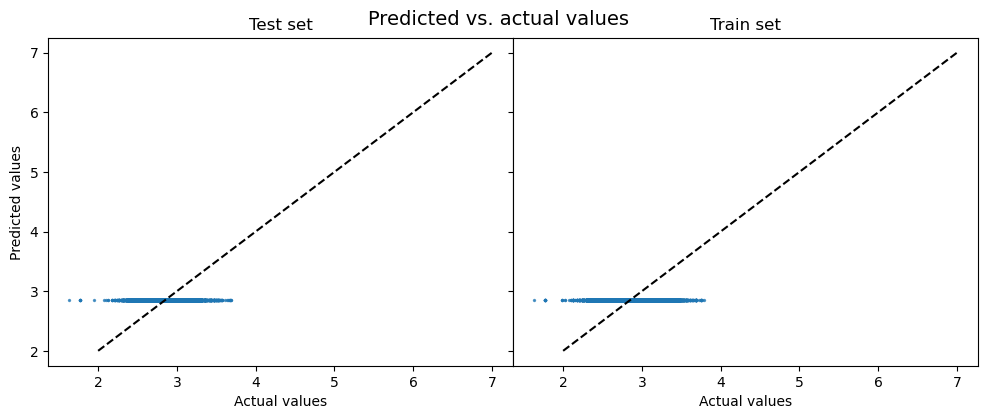

In [290]:
nn_model_evaluation(nn4)


In [291]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(13, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(13, activation='relu'))
nn2.add(layers.Dense(6, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                377       
                                                                 
 dense_10 (Dense)            (None, 13)                182       
                                                                 
 dense_11 (Dense)            (None, 6)                 84        
                                                                 
 dense_12 (Dense)            (None, 1)                 7         
                                                                 
Total params: 650 (2.54 KB)
Trainable params: 650 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [292]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 108.0531 - mean_squared_error: 108.0531 - val_loss: 1.7207 - val_mean_squared_error: 1.7207
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7570 - mean_squared_error: 0.7570 - val_loss: 0.2828 - val_mean_squared_error: 0.2828
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.1179 - val_mean_squared_error: 0.1179
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 7/100
110/11

970/970 [==============================] - 1s 990us/step
Training MSE: 0.026
Validation MSE: 0.0268

Training r2: 0.5423
Validation r2: 0.5306


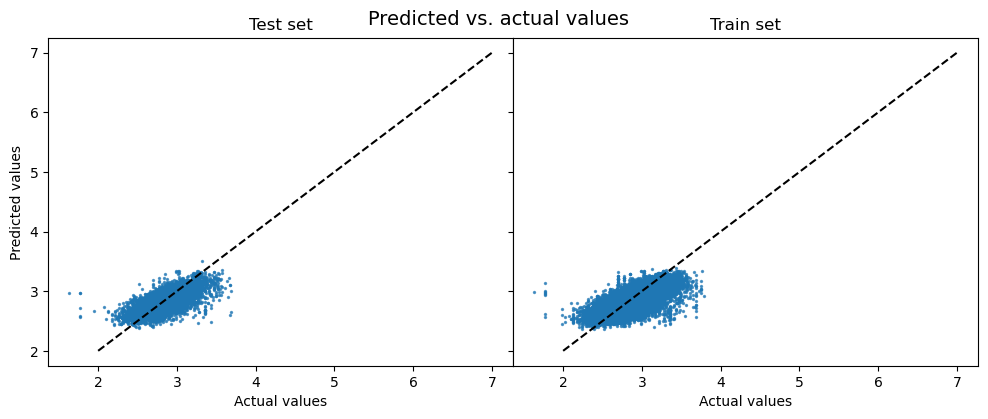

In [293]:
nn_model_evaluation(nn2)
